In [21]:
# preload dataset automatically, if not already in place.
import os
from pathlib import Path
import numpy as np
import pandas as pd
import gdown

def download_file_from_gdrive(file_url, filename, out_path: Path, overwrite=False):
    """
    Downloads a file from GDrive given an URL
    :param file_url: a string formated as https://drive.google.com/uc?id=<file_id>
    :param: the desired file name
    :param: the desired folder where the file will be downloaded to
    :param overwrite: whether to overwrite the file if it already exists
    """
    file_exists = os.path.exists(f'{out_path}/{filename}')

    if (file_exists and overwrite) or (not file_exists):
        os.system(f'gdown {file_url} -O {out_path}/{filename}')

In [22]:
FILE_URL = "https://drive.google.com/uc?id=1_lqydkMrmyNAgG4vU4wVmp6-j7tV0XI8"
FILE_NAME = "renthop_train.json.gz"
DATA_PATH = Path("../../_static/data/")

download_file_from_gdrive(file_url=FILE_URL, filename= FILE_NAME, out_path=DATA_PATH)



In [23]:
df = pd.read_json(DATA_PATH / FILE_NAME, compression="gzip",
                  convert_dates=['created'])

In [24]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


## Text


In [11]:
texts = ["i have a cat", "you have a dog", "you and i have a cat and a dog"]

In [12]:
vocabulary = list(
    enumerate(set([word for sentence in texts for word in sentence.split()]))
)
print("Vocabulary:", vocabulary)


def vectorize(text):
    vector = np.zeros(len(vocabulary))
    for i, word in vocabulary:
        num = 0
        for w in text:
            if w == word:
                num += 1
        if num:
            vector[i] = num
    return vector



Vocabulary: [(0, 'and'), (1, 'dog'), (2, 'i'), (3, 'a'), (4, 'cat'), (5, 'have'), (6, 'you')]


In [13]:
print("Vectors:")
for sentence in texts:
    print(vectorize(sentence.split()))

Vectors:
[0. 0. 1. 1. 1. 1. 0.]
[0. 1. 0. 1. 0. 1. 1.]
[2. 1. 1. 2. 1. 1. 1.]


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1, 1))
vect.fit_transform(["no i have cows", "i have no cows"]).toarray()

array([[1, 1, 1],
       [1, 1, 1]])

In [15]:
vect.vocabulary_

{'no': 2, 'have': 1, 'cows': 0}

In [16]:
vect = CountVectorizer(ngram_range=(1, 2))
vect.fit_transform(["no i have cows", "i have no cows"]).toarray()

array([[1, 1, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 0]])

In [17]:
vect.vocabulary_

{'no': 4,
 'have': 1,
 'cows': 0,
 'no have': 6,
 'have cows': 2,
 'have no': 3,
 'no cows': 5}

In [31]:
from scipy.spatial.distance import euclidean
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(3, 3), analyzer="char_wb")

n1, n2, n3, n4 = vect.fit_transform(
    ["andersen", "petersen", "petrov", "smith"]
).toarray()

euclidean(n1, n2), euclidean(n2, n3), euclidean(n3, n4)

(2.8284271247461903, 3.1622776601683795, 3.3166247903554)

## Image

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from keras.preprocessing import image

In [10]:
import numpy as np

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [14]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 7

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [15]:
torchvision.utils.make_grid(images)

tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.3882,  ...,  0.2314,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000, -0.0902,  ..., -0.6706,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.4039,  ...,  0.4588,  0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000, -0.0902,  ..., -0.6000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0

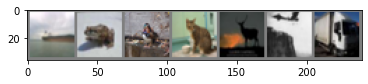

ship  frog  bird  cat   deer  plane truck


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [11]:
from scipy.misc import face

In [2]:
import pytesseract

from PIL import Image
import requests
from io import BytesIO

##### Just a random picture from search
img = "http://ohscurrent.org/wp-content/uploads/2015/09/domus-01-google.jpg"
img = requests.get(img)
img = Image.open(BytesIO(img.content))


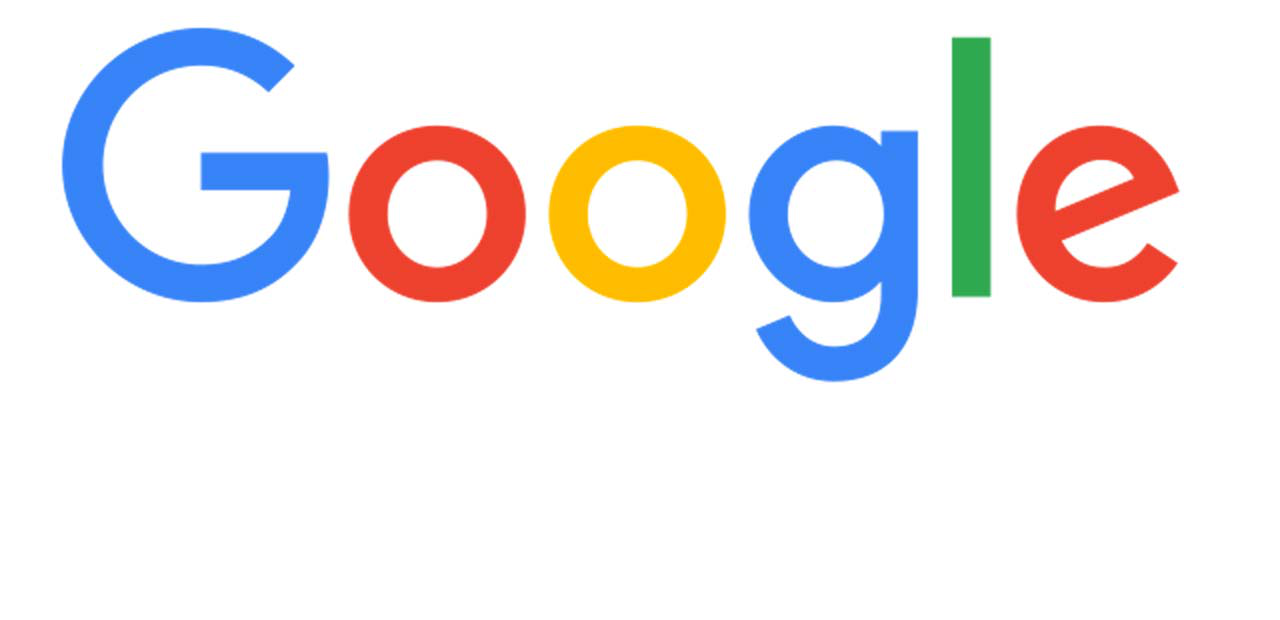

In [3]:
img

In [4]:
text = pytesseract.image_to_string(img)

print(text)

Google



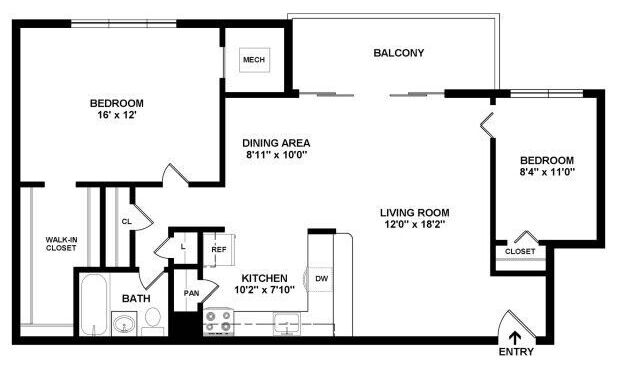

In [7]:
img

In [5]:
img = "https://habrastorage.org/webt/mj/uv/6o/mjuv6olsh1x9xxe1a6zjy79u1w8.jpeg"
img = requests.get(img)
img = Image.open(BytesIO(img.content))

print(pytesseract.image_to_string(img))

‘BEDROOM
1exI2

DINING AREA
11" 100"

uvinc Room
120" 182"

KITCHEN
102" x T10"

x1t0"




## Geospatial

In [25]:
import reverse_geocoder as revgc

revgc.search(list(zip(df.latitude, df.longitude)))

Loading formatted geocoded file...


[{'lat': '40.74482',
  'lon': '-73.94875',
  'name': 'Long Island City',
  'admin1': 'New York',
  'admin2': 'Queens County',
  'cc': 'US'},
 {'lat': '40.74482',
  'lon': '-73.94875',
  'name': 'Long Island City',
  'admin1': 'New York',
  'admin2': 'Queens County',
  'cc': 'US'},
 {'lat': '40.74482',
  'lon': '-73.94875',
  'name': 'Long Island City',
  'admin1': 'New York',
  'admin2': 'Queens County',
  'cc': 'US'},
 {'lat': '40.74482',
  'lon': '-73.94875',
  'name': 'Long Island City',
  'admin1': 'New York',
  'admin2': 'Queens County',
  'cc': 'US'},
 {'lat': '40.74482',
  'lon': '-73.94875',
  'name': 'Long Island City',
  'admin1': 'New York',
  'admin2': 'Queens County',
  'cc': 'US'},
 {'lat': '40.71427',
  'lon': '-74.00597',
  'name': 'New York City',
  'admin1': 'New York',
  'admin2': '',
  'cc': 'US'},
 {'lat': '40.71427',
  'lon': '-74.00597',
  'name': 'New York City',
  'admin1': 'New York',
  'admin2': '',
  'cc': 'US'},
 {'lat': '40.78343',
  'lon': '-73.96625',
  

## Date and time


In [26]:
df['dow'] = df['created'].apply(lambda x: x.date().weekday())
df['is_weekend'] = df['created'].apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)

In [28]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,dow,is_weekend
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium,3,0
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low,2,0
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium,1,0
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium,4,0
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low,1,0


In [29]:
def make_harmonic_features(value, period=24):
    value *= 2 * np.pi / period
    return np.cos(value), np.sin(value)

In [32]:
from scipy.spatial import distance

euclidean(make_harmonic_features(23), make_harmonic_features(1))

0.5176380902050423

In [33]:
euclidean(make_harmonic_features(9), make_harmonic_features(11))

0.5176380902050414

In [36]:
make_harmonic_features(23), make_harmonic_features(1), make_harmonic_features(0)

((0.9659258262890681, -0.2588190451025215),
 (0.9659258262890683, 0.25881904510252074),
 (1.0, 0.0))

In [37]:
euclidean(make_harmonic_features(9), make_harmonic_features(21))

2.0000000000000004

In [38]:
make_harmonic_features(9), make_harmonic_features(21)

((-0.7071067811865475, 0.7071067811865476),
 (0.7071067811865475, -0.7071067811865477))

In [39]:
euclidean(make_harmonic_features(0), make_harmonic_features(12))

2.0

In [40]:
euclidean(make_harmonic_features(0), make_harmonic_features(6))

1.414213562373095

## Time series, web, etc.

In [42]:
# Install pyyaml ua-parser user-agents
import user_agents

ua = "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/56.0.2924.76 Chrome/56.0.2924.76 Safari/537.36"
ua = user_agents.parse(ua)

print("Is a bot? ", ua.is_bot)
print("Is mobile? ", ua.is_mobile)
print("Is PC? ", ua.is_pc)
print("OS Family: ", ua.os.family)
print("OS Version: ", ua.os.version)
print("Browser Family: ", ua.browser.family)
print("Browser Version: ", ua.browser.version)

Is a bot?  False
Is mobile?  False
Is PC?  True
OS Family:  Ubuntu
OS Version:  ()
Browser Family:  Chromium
Browser Version:  (56, 0, 2924)


In [46]:
ua.device

Device(family='Other', brand=None, model=None)

# Feature transformation

## Normalization


### Standart scaling


In [47]:
import numpy as np
from scipy.stats import beta, shapiro
from sklearn.preprocessing import StandardScaler

data = beta(1, 10).rvs(1000).reshape(-1, 1)
shapiro(data)

ShapiroResult(statistic=0.8551343679428101, pvalue=2.5346110755142074e-29)

In [49]:
# Value of the statistic, p-value
shapiro(StandardScaler().fit_transform(data))

# With such p-value we'd have to reject the null hypothesis of normality of the data

ShapiroResult(statistic=0.8551347255706787, pvalue=2.5347744786329265e-29)

In [50]:
data = np.array([1, 1, 0, -1, 2, 1, 2, 3, -2, 4, 100]).reshape(-1, 1).astype(np.float64)
StandardScaler().fit_transform(data)

array([[-0.31922662],
       [-0.31922662],
       [-0.35434155],
       [-0.38945648],
       [-0.28411169],
       [-0.31922662],
       [-0.28411169],
       [-0.24899676],
       [-0.42457141],
       [-0.21388184],
       [ 3.15715128]])

In [51]:
shapiro(data)

ShapiroResult(statistic=0.3991349935531616, pvalue=9.58652890403755e-08)

In [52]:
shapiro(StandardScaler().fit_transform(data))

ShapiroResult(statistic=0.39913511276245117, pvalue=9.58652890403755e-08)

In [53]:
(data - data.mean()) / data.std()

array([[-0.31922662],
       [-0.31922662],
       [-0.35434155],
       [-0.38945648],
       [-0.28411169],
       [-0.31922662],
       [-0.28411169],
       [-0.24899676],
       [-0.42457141],
       [-0.21388184],
       [ 3.15715128]])

In [54]:
data

array([[  1.],
       [  1.],
       [  0.],
       [ -1.],
       [  2.],
       [  1.],
       [  2.],
       [  3.],
       [ -2.],
       [  4.],
       [100.]])

### MinMaxScaling

In [55]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler().fit_transform(data)

array([[0.02941176],
       [0.02941176],
       [0.01960784],
       [0.00980392],
       [0.03921569],
       [0.02941176],
       [0.03921569],
       [0.04901961],
       [0.        ],
       [0.05882353],
       [1.        ]])

In [57]:
shapiro(MinMaxScaler().fit_transform(data))

ShapiroResult(statistic=0.3991350531578064, pvalue=9.58652890403755e-08)

In [58]:
(data - data.min()) / (data.max() - data.min())

array([[0.02941176],
       [0.02941176],
       [0.01960784],
       [0.00980392],
       [0.03921569],
       [0.02941176],
       [0.03921569],
       [0.04901961],
       [0.        ],
       [0.05882353],
       [1.        ]])

### Lognorm


In [62]:
from scipy.stats import lognorm

data = lognorm(s=1).rvs(1000)

shapiro(data), shapiro(np.log(data))


(ShapiroResult(statistic=0.5852692127227783, pvalue=1.555441295400547e-43),
 ShapiroResult(statistic=0.9981774687767029, pvalue=0.36508840322494507))

In [61]:
len(data)

1000

In [63]:
# Let's draw plots!
import statsmodels.api as sm

# Let's take the price feature from Renthop dataset and filter by hands the most extreme values for clarity

price = df.price[(df.price <= 20000) & (df.price > 500)]
price_log = np.log(price)

# A lot of gestures so that sklearn didn't shower us with warnings
price_mm = (
    MinMaxScaler()
    .fit_transform(price.values.reshape(-1, 1).astype(np.float64))
    .flatten()
)
price_z = (
    StandardScaler()
    .fit_transform(price.values.reshape(-1, 1).astype(np.float64))
    .flatten()
)

In [69]:
df.price.describe(), df.price.min(), df.price.max()

(count    4.935200e+04
 mean     3.830174e+03
 std      2.206687e+04
 min      4.300000e+01
 25%      2.500000e+03
 50%      3.150000e+03
 75%      4.100000e+03
 max      4.490000e+06
 Name: price, dtype: float64,
 43,
 4490000)

/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


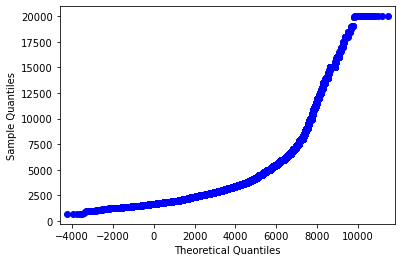

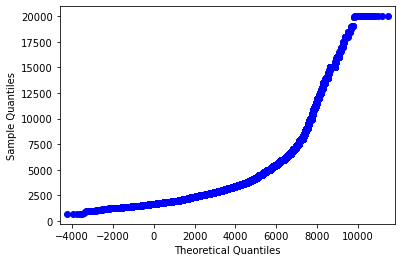

In [70]:
sm.qqplot(price, loc=price.mean(), scale=price.std())

/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


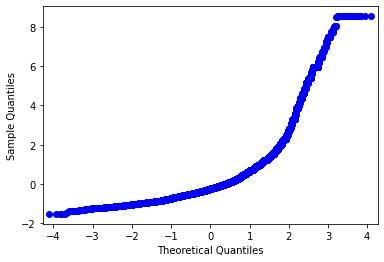

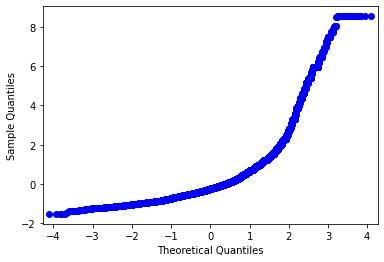

In [71]:
sm.qqplot(price_z, loc=price_z.mean(), scale=price_z.std())

/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


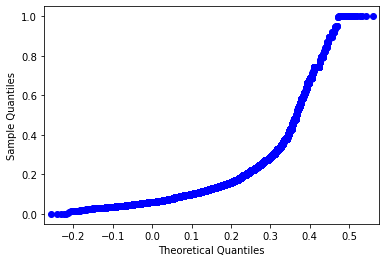

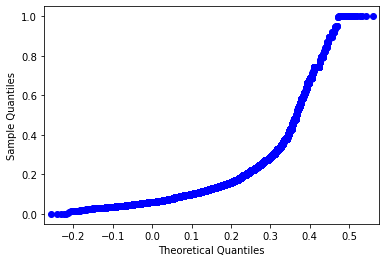

In [72]:
sm.qqplot(price_mm, loc=price_mm.mean(), scale=price_mm.std())

/Users/aleksashka/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


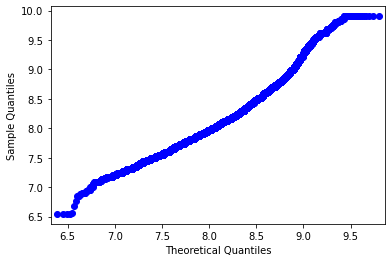

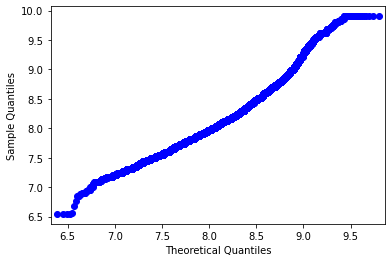

In [73]:
sm.qqplot(price_log, loc=price_log.mean(), scale=price_log.std())

## Interactions

In [75]:
rooms = df["bedrooms"].apply(lambda x: max(x, 0.5))
# Avoid division by zero; .5 is chosen more or less arbitrarily
df["price_per_bedroom"] = df["price"] / rooms

In [76]:
df

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,dow,is_weekend,price_per_bedroom
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium,3,0,2400.000000
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low,2,0,1900.000000
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium,1,0,1747.500000
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium,4,0,1000.000000
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low,1,0,5590.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,low,1,0,933.333333
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,medium,5,1,1197.500000
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,medium,1,0,1850.000000
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,medium,1,0,2097.500000


## Filling in the missing values

In [77]:
df = df.fillna(0)

# Feature selection

## Statistical approaches

In [78]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import VarianceThreshold

x_data_generated, y_data_generated = make_classification()
x_data_generated.shape

(100, 20)

In [79]:
x_data_generated

array([[-0.47320483,  0.15345606, -0.98951928, ..., -1.01121081,
         0.88874743, -0.01590591],
       [ 0.84294984,  0.84652512, -0.35602998, ...,  0.90029631,
         0.07584412, -2.67080155],
       [-0.74295992, -1.24112143, -0.11236725, ..., -0.13650927,
        -1.55649219, -1.50625936],
       ...,
       [ 0.21167827,  0.46967559,  1.24937828, ...,  0.69419928,
         0.00372216,  0.0558174 ],
       [ 0.04860613, -0.20311789, -1.99745032, ...,  0.39134992,
        -0.07821599, -0.26529066],
       [-1.46600226, -0.12502846,  0.80723057, ..., -1.50398551,
        -1.12054902,  0.21543019]])

In [80]:
VarianceThreshold(0.7).fit_transform(x_data_generated).shape

(100, 19)

In [81]:
VarianceThreshold(0.8).fit_transform(x_data_generated).shape

(100, 18)

In [82]:
VarianceThreshold(0.9).fit_transform(x_data_generated).shape

(100, 16)

In [83]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

x_data_kbest = SelectKBest(f_classif, k=5).fit_transform(
    x_data_generated, y_data_generated
)
x_data_varth = VarianceThreshold(0.9).fit_transform(x_data_generated)


In [84]:
logit = LogisticRegression(solver="lbfgs", random_state=17)

In [89]:
cross_val_score(
    logit, x_data_generated, y_data_generated, scoring="neg_log_loss", cv=5
).mean()

-0.4688201874329737

In [86]:
cross_val_score(
    logit, x_data_kbest, y_data_generated, scoring="neg_log_loss", cv=5
).mean()

-0.37044400553019974

In [87]:
cross_val_score(
    logit, x_data_varth, y_data_generated, scoring="neg_log_loss", cv=5
).mean()

-0.4063748828515689

## Selection by modeling

In [90]:
# Synthetic example

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

x_data_generated, y_data_generated = make_classification()

rf = RandomForestClassifier(n_estimators=10, random_state=17)
pipe = make_pipeline(SelectFromModel(estimator=rf), logit)

print(
    cross_val_score(
        logit, x_data_generated, y_data_generated, scoring="neg_log_loss", cv=5
    ).mean()
)
print(
    cross_val_score(
        rf, x_data_generated, y_data_generated, scoring="neg_log_loss", cv=5
    ).mean()
)
print(
    cross_val_score(
        pipe, x_data_generated, y_data_generated, scoring="neg_log_loss", cv=5
    ).mean()
)

-0.48566823309104173
-0.42661013981201046
-0.3483411103348648


In [91]:
# x_data, y_data = get_data()
x_data = x_data_generated
y_data = y_data_generated

pipe1 = make_pipeline(StandardScaler(), SelectFromModel(estimator=rf), logit)

pipe2 = make_pipeline(StandardScaler(), logit)

print(
    "LR + selection: ",
    cross_val_score(pipe1, x_data, y_data, scoring="neg_log_loss", cv=5).mean(),
)
print(
    "LR: ", cross_val_score(pipe2, x_data, y_data, scoring="neg_log_loss", cv=5).mean()
)
print("RF: ", cross_val_score(rf, x_data, y_data, scoring="neg_log_loss", cv=5).mean())

LR + selection:  -0.348343514444306
LR:  -0.4768611506180493
RF:  -0.42661013981201046


## Grid search

In [95]:
from mlxtend.feature_selection import SequentialFeatureSelector

selector = SequentialFeatureSelector(
     logit, scoring="neg_log_loss", verbose=2, k_features=3, forward=False
 )

selector.fit(x_data, y_data)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s finished

[2022-07-25 23:02:27] Features: 19/3 -- score: -0.44073444152071806[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished

[2022-07-25 23:02:28] Features: 18/3 -- score: -0.41939393469046926[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished

[2022-07-25 23:02:28] Features: 17/3 -- score: -0.3995502312230518[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D

SequentialFeatureSelector(estimator=LogisticRegression(random_state=17),
                          forward=False, k_features=3, scoring='neg_log_loss',
                          verbose=2)